# Pandas Practice 3 (Bike Share Data)

As a data scientist, you don't always have to invent the wheel from scratch. The great advantage of Python is that smart people before you spend a lot of energy on making life easier for the next programers. So please, make your life easier and use code that has already been implemented, don't call it "copying" but "friendly borrowing" of other people's code. If you copy whole functions or great graphs in the future, don't forget to give props to the inventor!

So for this exercise, too, if you get stuck at any point, look at good solutions from others and learn a lot from them about how to solve these problems even better.
Here are two good resources for small code snippet which can be very helpful when dealing with DataFrames:

- [Sebastian Raschkas "Things in Pandas I Wish I'd Known Earlier"](https://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb)
- [Helpful Python Code Snippets for Data Exploration in Pandas](https://medium.com/@msalmon00/helpful-python-code-snippets-for-data-exploration-in-pandas-b7c5aed5ecb9)
- [Manipulating tabular data with Pandas](https://neuroimaging-data-science.org/content/004-scipy/002-pandas.html)


**By the end of this session you should be able to**
- Explore data with Pandas to answer conceptual questions
- Write chained commands for efficient one-liners



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/bike_share_201402_trip_data.csv')

How many observations are there?

In [25]:
df.shape

(144015, 11)

Change the columns to be pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 


In [9]:
df.columns = [c.lower() for c in df.columns]
df.columns = [c.replace(" ", "_") for c in df.columns ]
df.columns = [c.replace("#", "num") for c in df.columns ]

How many types of subscription options are there? What are the different subscription types?

In [8]:
df['subscription_type'].unique()

<StringArray>
['Subscriber', 'Customer']
Length: 2, dtype: str

What is the frequency of each subscription option?

In [ ]:
df['subscription_type'].value_counts()

subscription type
Subscriber    113647
Customer       30368
Name: count, dtype: int64

Please plot the frequency of each subscription option with a pie chart:

<Axes: >

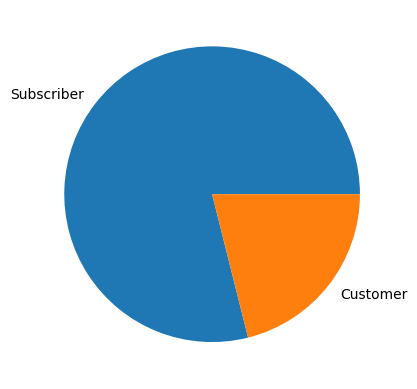

In [ ]:
df['subscription_type'].value_counts().plot(kind='pie')

Please plot the frequency of each subscription option with a bar chart:

<Axes: xlabel='subscription type'>

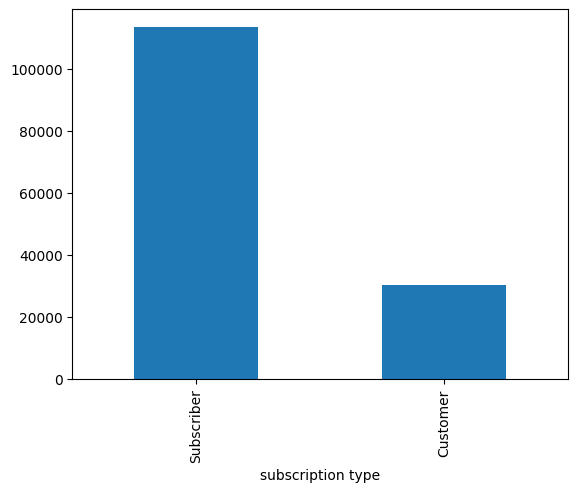

In [ ]:
df['subscription_type'].value_counts().plot(kind='bar')

Have a look at the start_station column: Which 10 stations occur most frequently?

In [24]:
df.start_station.value_counts().head(10)

start_station
San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Market at 4th                                    5030
2nd at Townsend                                  4987
San Francisco Caltrain 2 (330 Townsend)          4976
Steuart at Market                                4913
Townsend at 7th                                  4493
Name: count, dtype: int64

Now look at the end_station column: Which 10 stations occur the least often?

In [25]:
df.start_station.value_counts().tail(10)

start_station
Park at Olive                       189
Castro Street and El Camino Real    132
Redwood City Medical Center         123
San Antonio Shopping Center         108
San Mateo County Center             101
Franklin at Maple                    99
Broadway at Main                     45
Redwood City Public Library          44
San Jose Government Center           23
Mezes Park                            3
Name: count, dtype: int64

Create a table that has start_station segmented by subscription_type and include also the row/column margins (subtotals). If you are not sure how to do it, check out the documentation for `pd.crosstab()`.

In [7]:
df_cross = pd.crosstab(df.start_station, df.subscription_type, margins=True, margins_name="Subtotal")
df_cross

subscription_type,Customer,Subscriber,Subtotal
start_station,,,
2nd at Folsom,427,3349,3776
2nd at South Park,535,3923,4458
2nd at Townsend,882,4105,4987
5th at Howard,606,2029,2635
Adobe on Almaden,75,260,335
...,...,...,...
Townsend at 7th,518,3975,4493
University and Emerson,328,106,434
Washington at Kearney,561,911,1472


Let's look at the duration... Which unit do you think is used here?

How long is the shortest trip? How many are that short?

In [17]:
#df.duration.sort_values(ascending=True)
print(f'Shortest Trip: {df.duration.min()} seconds')

Shortest Trip: 60 seconds


What do you think is going on with the short trips?

In [ ]:
# no idea, maybe minimum trip time?

What is the longest trip?

In [19]:
df.duration.max()

np.int64(722236)

How would you define a "long" trip? How many trips are "long" according to your definition?

In [21]:
# long trip: > 30 minutes
df[df.duration > 30*60].shape

(9287, 11)

Do the long durations seem reasonable? Why are they so long? What could it tell us about the users?

In [ ]:
# might be forgetting to lock bikes again or just blocking them instead of buying an own bike. Or they use them for day trips.  

Plot the duration column.

<Axes: >

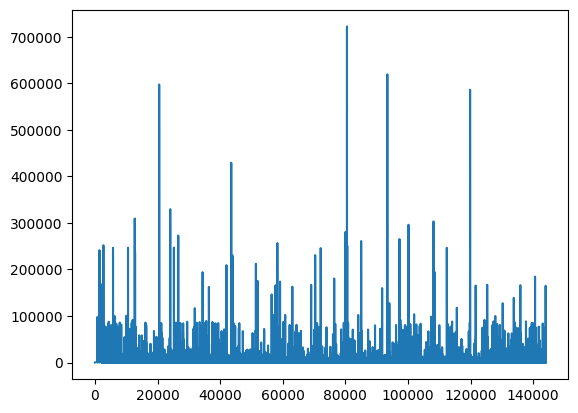

In [5]:
df.duration.plot()

Does this plot give any insights?

In [ ]:
# Some rentals seem to be counted at whole days, bcs its multiples of 24hrs?

Select subsections of the data to make plots that provide more insights.

The Product Team would like all of the station names to be lower case and  with `_` as a separator

`South Van Ness at Market` -> `south_van_ness_at_market`  

**DO NOT USE A FOR LOOP. THEY ARE THE 👿**

In [13]:
df.start_station = df.start_station.str.lower().str.replace(' ', '_')
df.end_station = df.end_station.str.lower().str.replace(' ', '_')

In [ ]:
# lambda should be faster
df.start_station.apply(lambda x: x.lower().replace(' ', '_'))
df.end_station.apply(lambda x: x.lower().replace(' ', '_'))

0                     south_van_ness_at_market
1                           san_jose_city_hall
2                      mountain_view_city_hall
3                           san_jose_city_hall
4                               market_at_10th
                          ...                 
144010                south_van_ness_at_market
144011                        davis_at_jackson
144012                           market_at_4th
144013    harry_bridges_plaza_(ferry_building)
144014                         townsend_at_7th
Name: end_station, Length: 144015, dtype: str

Now take a timer and set it to 15 minutes. Take this time to explore the data guided by your own intuition or hypotheses…
> Time boxing is a helpful approach when working with a new dataset so you won't fall into any rabbit holes. 